In [251]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
# To see how many rows and columns are there in our data
df.shape

(10000, 14)

In [207]:
# To see whether we any null data or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [209]:
# Any rows that are duplicated
df.duplicated().sum()

0

In [211]:
# Dataset is imbalace or not
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [213]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [215]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [217]:
## Removing fisrt three columns 
## inplace = True for permanant changes in df
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [219]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [221]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [225]:
X_train.shape

(8000, 11)

In [227]:
y_train.shape

(8000,)

In [229]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [233]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim =11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\divya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [235]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [237]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [239]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4104 - loss: 0.8561 - val_accuracy: 0.7975 - val_loss: 0.5194
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.4929 - val_accuracy: 0.7962 - val_loss: 0.4712
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4610 - val_accuracy: 0.7969 - val_loss: 0.4516
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4335 - val_accuracy: 0.8069 - val_loss: 0.4366
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4259 - val_accuracy: 0.8112 - val_loss: 0.4208
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8208 - loss: 0.4102 - val_accuracy: 0.8188 - val_loss: 0.4048
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4015 - val_accuracy: 0.8313 - val_loss: 0.3909
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8345 - loss: 0.3847 - val_accu

In [240]:
model.layers[0].get_weights()

[array([[ 1.05741106e-01, -3.46848033e-02,  1.83306843e-01,
         -8.61931294e-02,  3.75045165e-02,  1.15417428e-01,
          8.79760683e-02, -5.86355925e-02,  1.80298805e-01,
         -6.50780275e-02,  1.51628762e-01],
        [ 1.95327148e-01, -1.88145950e-03,  8.38978887e-01,
          7.08787620e-01, -2.31643125e-01, -1.20938748e-01,
         -9.16233182e-01, -6.83269128e-02,  2.68704534e-01,
         -5.99819660e-01, -2.28774056e-01],
        [ 1.14929706e-01,  1.28849670e-01, -1.81254640e-01,
          2.57633805e-01,  4.28545326e-01, -2.95964535e-02,
         -1.37434602e-02, -1.27607331e-01, -2.16005459e-01,
         -1.84833929e-01, -2.58999974e-01],
        [-1.51845658e+00,  2.31453646e-02,  3.67335916e-01,
         -7.26729751e-01, -5.41688681e-01,  3.37270975e-01,
         -7.61255948e-03, -5.42679906e-01,  6.17799997e-01,
          3.64265084e-01, -2.38901868e-01],
        [-3.82094085e-01,  1.17550111e+00,  5.06114483e-01,
          3.58548723e-02,  1.72269687e-01, -

In [241]:
model.layers[1].get_weights()

[array([[ 0.03331573,  0.43337572,  0.54975826, -0.21494812, -0.99974126,
          0.15012735, -0.28391123,  0.08929059, -0.5683956 , -0.13784142,
         -0.10462871],
        [-0.10333272,  0.12082186,  0.34413365, -0.44108048,  0.8209895 ,
          0.3467308 , -0.09268405,  0.0989542 ,  0.49262637,  0.3183007 ,
          0.68968296],
        [-0.81195915, -0.20470765, -0.72145265,  0.13639441,  0.03381169,
          0.11719855,  0.85860884,  0.7190968 ,  0.46484974, -0.77103   ,
          0.46781594],
        [-0.18529613, -0.45413202,  0.40226057,  0.63405097,  0.07287777,
          0.14564726,  0.6516027 ,  0.36071813, -0.40809628, -0.53271073,
         -0.50406754],
        [-0.53724843, -0.16701435, -0.03076653,  0.56966037,  0.3082224 ,
         -0.61757433,  0.1867679 ,  0.40479165, -0.29489774,  0.0261069 ,
         -0.23915663],
        [ 0.04570732, -0.28736472, -0.05858654,  0.17689608,  0.27666822,
          0.43623862,  0.21710414,  0.56883484,  0.06626512,  0.4202903

In [242]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [243]:
y_pred = np.where(y_log>0.5,1,0)

In [244]:
accuracy_score(y_test,y_pred)

0.8615

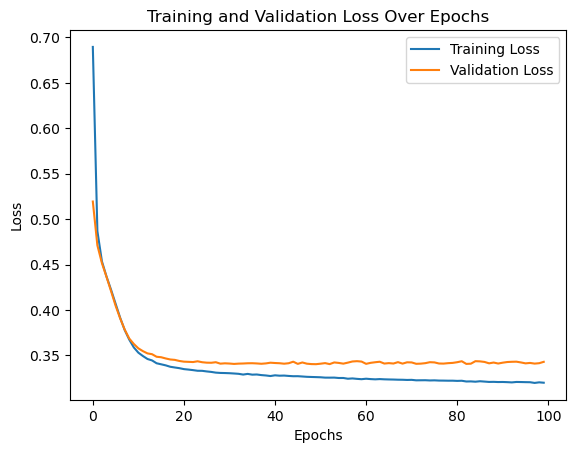

In [255]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

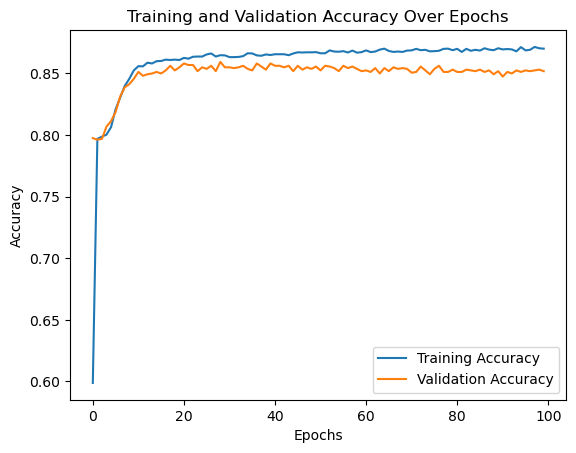

In [257]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()